# 0.Load Module

In [ ]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import decoupler as dc
from gseapy.scipalette import SciPalette
import gseapy as gp
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
data_dir = '/home/lzz/atac/output/'
save_dir = '/home/lzz/atac/output/'

# 1.enrichment analysis

## 1.1 up regulation

In [ ]:
deg_df = pd.read_csv(data_dir+'up_regulated_diff_anno.csv', index_col=0)
deg_df

,PeakID (cmd=annotatePeaks.pl /mnt/i/Suspended/ATAC-seq/mm10_t3_atac/Runtime/data/peak_info.bed mm10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
17,B21-3A_FKDL190740160-1a_peak_164748b,chr14,31669753,31670252,+,0,NaN,Intergenic,NaN,28945.0,NM_025295,26363.0,Mm.282679,NM_025295,ENSMUSG00000021900,Btd,-,biotinidase,protein-coding
39,B21-1A_FKDL190740158-1a_peak_406022b,chr6,120077066,120077565,+,0,NaN,Intergenic,NaN,-16065.0,NM_016718,29862.0,Mm.103668,NM_016718,ENSMUSG00000041377,Ninj2,-,ninjurin 2,protein-coding
41,T21-2A_FKDL190740162-1a_peak_292672,chr2,148536453,148536952,+,0,NaN,Intergenic,NaN,-93167.0,NM_010740,17064.0,Mm.681,NM_010740,ENSMUSG00000027435,Cd93,6030404G09Rik|AA145088|AA4.1|AW555904|C1qr1|C1...,CD93 antigen,protein-coding
75,T21-3A_FKDL190740163-1a_peak_84721,chr12,99213176,99213675,+,0,NaN,intron,NaN,-50617.0,NR_038130,67639.0,Mm.87374,NR_038130,ENSMUSG00000113210,4930474N09Rik,-,RIKEN cDNA 4930474N09 gene,ncRNA
143,S21-3A_FKDL190740157-1a_peak_345439c,chr6,120082854,120083353,+,0,NaN,Intergenic,NaN,-10277.0,NM_016718,29862.0,Mm.103668,NM_016718,ENSMUSG00000041377,Ninj2,-,ninjurin 2,protein-coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34002,T21-1A_FKDL190740161-1a_peak_448235,chr8,57589151,57589650,+,0,NaN,intron,NaN,-62353.0,NR_040698,100502619.0,Mm.393851,NR_040698,NaN,AW046200,-,expressed sequence AW046200,ncRNA
34005,B21-3A_FKDL190740160-1a_peak_220692a,chr16,52060199,52060698,+,0,NaN,intron,NaN,28899.0,NM_001033238,208650.0,Mm.328206,NM_001033238,ENSMUSG00000022637,Cblb,AI429560|AI851073|Cbl-b,Casitas B-lineage lymphoma b,protein-coding
34013,T21-1A_FKDL190740161-1a_peak_464359b,chr8,122144730,122145229,+,0,NaN,Intergenic,NaN,-85295.0,NM_001362883,195209.0,Mm.102191,NM_001362883,NaN,Zfp469,Gm22,zinc finger protein 469,protein-coding
34202,T21-1A_FKDL190740161-1a_peak_481485a,chr9,64564307,64564806,+,0,NaN,intron,NaN,173200.0,NM_017382,53869.0,Mm.1387,NM_017382,ENSMUSG00000004771,Rab11a,-,"RAB11A, member RAS oncogene family",protein-coding


In [ ]:
gene_sets=[
    'Reactome_2022', 'MSigDB_Hallmark_2020', 'KEGG_2019_Mouse',
    'GO_Biological_Process_2023', 'WikiPathways_2019_Mouse']

In [ ]:
enr_up = gp.enrichr(
    gene_list=list(deg_df['Gene Name']),
    gene_sets=gene_sets,
    cutoff = 1,
    organism='mouse',
    outdir=save_dir+'atac_bs_up_regulated')

## 1.2 down regulation

In [ ]:
deg_df = pd.read_csv(data_dir+'down_regulated_diff_anno.csv', index_col=0)
deg_df

,PeakID (cmd=annotatePeaks.pl /mnt/i/Suspended/ATAC-seq/mm10_t3_atac/Runtime/data/peak_info.bed mm10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
16,S21-2A_FKDL190740156-1a_peak_112861,chr12,85818369,85818868,+,0,NaN,TTS (NM_001360813),NaN,6275.0,NM_001360451,58520.0,Mm.143795,NM_021446,ENSMUSG00000021252,Erg28,0610007P14Rik|1190004E09Rik|AU019315|C77855|ORF11,ergosterol biosynthesis 28,protein-coding
51,B21-1A_FKDL190740158-1a_peak_473156e,chr8,121084058,121084557,+,0,NaN,promoter-TSS (NM_010426),NaN,-79.0,NM_010426,15227.0,Mm.33897,NM_010426,ENSMUSG00000042812,Foxf1,AI450827|FREAC1|Foxf1a|Freac-1|HFH-8|Hfh8,forkhead box F1,protein-coding
118,T21-2A_FKDL190740162-1a_peak_416506d,chr6,72899613,72900112,+,0,NaN,promoter-TSS (NM_001347231),NaN,117.0,NM_019715,74287.0,Mm.29194,NM_019715,ENSMUSG00000055239,Kcmf1,1700094M07Rik|Debt91|Pmcf,potassium channel modulatory factor 1,protein-coding
254,S21-2A_FKDL190740156-1a_peak_269106b,chr2,14055831,14056330,+,0,NaN,promoter-TSS (NM_013935),NaN,-45.0,NM_001012396,30963.0,Mm.241205,NM_013935,ENSMUSG00000063275,Hacd1,Ptpla,3-hydroxyacyl-CoA dehydratase 1,protein-coding
303,S21-2A_FKDL190740156-1a_peak_206947,chr16,91597556,91598055,+,0,NaN,promoter-TSS (NM_030018),NaN,-125.0,NM_030018,77975.0,Mm.290341,NM_030018,ENSMUSG00000022964,Tmem50b,AU015466|AU019872|B230114J08Rik,transmembrane protein 50B,protein-coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34027,S21-2A_FKDL190740156-1a_peak_52221c,chr10,84533863,84534362,+,0,NaN,promoter-TSS (NM_175451),NaN,-224.0,NM_175451,216197.0,Mm.334999,NM_175451,ENSMUSG00000046841,Ckap4,5630400A09Rik|CLIMP-63|P63,cytoskeleton-associated protein 4,protein-coding
34085,B21-3A_FKDL190740160-1a_peak_463377b,chr6,90764076,90764575,+,0,NaN,"intron (NM_001356440, intron 1 of 13)",NaN,45798.0,NM_001134384,232227.0,Mm.196943,NM_182784,ENSMUSG00000034312,Iqsec1,AW561907|BC026481|BRAG2|D6Ertd349e|cI-43,IQ motif and Sec7 domain 1,protein-coding
34131,S21-1A_FKDL190740155-1a_peak_505050a,chr5,134541605,134542104,+,0,NaN,"intron (NM_001039162, intron 1 of 15)",NaN,10580.0,NM_001039162,269713.0,Mm.255138,NM_009990,ENSMUSG00000063146,Clip2,B230327O20|CLIP-115|Clip1|Cyln2|WSCR4|mKIAA029...,CAP-GLY domain containing linker protein 2,protein-coding
34146,T21-2A_FKDL190740162-1a_peak_286804b,chr2,119314861,119315360,+,0,NaN,Intergenic,NaN,-10674.0,NM_019454,54485.0,Mm.143719,NM_019454,ENSMUSG00000027314,Dll4,Delta4,delta like canonical Notch ligand 4,protein-coding


In [ ]:
gene_sets=[
    'Reactome_2022', 'MSigDB_Hallmark_2020', 'KEGG_2019_Mouse',
    'GO_Biological_Process_2023', 'WikiPathways_2019_Mouse']

In [ ]:
enr_up = gp.enrichr(
    gene_list=list(deg_df['Gene Name']),
    gene_sets=gene_sets,
    cutoff = 1,
    organism='mouse',
    outdir=save_dir+'atac_bs_dw_regulated')

# 2.Pathway plot

## 2.1 up regulation

In [ ]:
pathwaydir = '/home/lzz/atac/output/atac_bs_up_regulated/'
dirlist = glob.glob(
    pathname=pathwaydir+'*reports.txt',
    recursive=True)
dirlist

['/home/lzz/atac/output/atac_bs_up_regulated/KEGG_2019_Mouse.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_up_regulated/MSigDB_Hallmark_2020.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_up_regulated/WikiPathways_2019_Mouse.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_up_regulated/Reactome_2022.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_up_regulated/GO_Biological_Process_2023.mouse.enrichr.reports.txt']

In [ ]:
filelist = []
for i in dirlist:
    tmp = pd.read_table(i)
    print(tmp.shape)
    filelist.append(tmp)

(1013, 10)
(47, 10)
(239, 10)
(2577, 10)
(114, 10)


In [ ]:
pathway_all = pd.concat(filelist, ignore_index=True)
pathway_sig = pathway_all.loc[pathway_all['Adjusted P-value'] < 0.05, :]
pathway_sig['Gene_set'].value_counts()
pathway_sig = pathway_sig.sort_values('Adjusted P-value')
pathway_sig = pathway_sig.reset_index(drop=True)
pathway_sig.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,31/200,5.754340e-16,2.704540e-14,0,0,7.446721,261.31590,BTG2;BTG1;CD83;PFKFB3;TNFAIP2;RNF19B;TNFAIP3;L...
1,MSigDB_Hallmark_2020,Inflammatory Response,24/200,2.971249e-10,6.982434e-09,0,0,5.453698,119.63710,ABCA1;BTG2;PTGER2;SLC11A2;LIF;IL18;OSM;SLC1A2;...
2,MSigDB_Hallmark_2020,IL-2/STAT5 Signaling,19/199,8.074251e-07,1.264966e-05,0,0,4.177448,58.60715,CD86;CD83;AHNAK;CD81;PTGER2;LIF;FURIN;TNFRSF1B...
3,GO_Biological_Process_2023,Regulation Of Bone Resorption (GO:0045124),9/28,1.811368e-08,4.667895e-05,0,0,18.523150,330.20470,DCSTAMP;IL6;UBASH3B;SYK;SRC;INPP5D;TMEM119;TNF...
4,GO_Biological_Process_2023,Cellular Response To Lipopolysaccharide (GO:00...,16/124,1.006214e-07,1.296507e-04,0,0,5.848985,94.23827,CD86;MEF2C;IL18;TNFAIP3;PTPN22;TNFRSF1B;MAPK14...


In [ ]:
pathway_sig['Term_sim'] = pathway_sig['Term'].str.split(' \\(GO|WP| R-HSA').str[0]
pathway_sig['-log10(Adjusted P-value)'] = -np.log10(pathway_sig['Adjusted P-value'])
pathway_sig.to_csv(pathwaydir+'combind_sig.csv')

In [ ]:
pathway_sig = pd.read_csv(pathwaydir+'combind_sig.csv', index_col=0)
pathway_sig

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Term_sim,-log10(Adjusted P-value)
0,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,31/200,5.754340e-16,2.704540e-14,0,0,7.446721,261.31590,BTG2;BTG1;CD83;PFKFB3;TNFAIP2;RNF19B;TNFAIP3;L...,TNF-alpha Signaling via NF-kB,13.567907
1,MSigDB_Hallmark_2020,Inflammatory Response,24/200,2.971249e-10,6.982434e-09,0,0,5.453698,119.63710,ABCA1;BTG2;PTGER2;SLC11A2;LIF;IL18;OSM;SLC1A2;...,Inflammatory Response,8.155993
2,MSigDB_Hallmark_2020,IL-2/STAT5 Signaling,19/199,8.074251e-07,1.264966e-05,0,0,4.177448,58.60715,CD86;CD83;AHNAK;CD81;PTGER2;LIF;FURIN;TNFRSF1B...,IL-2/STAT5 Signaling,4.897921
6,GO_Biological_Process_2023,Cytokine Production (GO:0001819),25/320,7.157978e-07,4.149478e-04,0,0,3.375413,47.76165,CD86;ITK;TXK;PTPN22;PDE4B;NLRP3;SLAMF6;TNFRSF1...,Cytokine Production,3.382007
17,MSigDB_Hallmark_2020,p53 Pathway,15/200,1.867878e-04,1.254146e-03,0,0,3.181938,27.31865,BTG2;BTG1;CD81;VDR;LIF;RNF19B;SLC7A11;FOS;IL1A...,p53 Pathway,2.901652
...,...,...,...,...,...,...,...,...,...,...,...,...
202,GO_Biological_Process_2023,Negative Regulation Of Cell Communication (GO:...,4/22,2.076424e-03,4.864495e-02,0,0,8.603932,53.14742,UBASH3B;INPP5D;LIF;OSM,Negative Regulation Of Cell Communication,1.312962
203,GO_Biological_Process_2023,Positive Regulation Of NIK/NF-kappaB Signaling...,6/53,2.155813e-03,4.960295e-02,0,0,4.955026,30.42182,CD86;TLR9;PDCD4;NLRP3;SASH1;TLR2,Positive Regulation Of NIK/NF-kappaB Signaling,1.304492
204,GO_Biological_Process_2023,Regulation Of Receptor Signaling Pathway Via J...,6/53,2.155813e-03,4.960295e-02,0,0,4.955026,30.42182,SOCS3;IL6;SOCS1;IL10RB;JAK2;IL7R,Regulation Of Receptor Signaling Pathway Via J...,1.304492
205,GO_Biological_Process_2023,Positive Regulation Of MAP Kinase Activity (GO...,8/91,2.177660e-03,4.966222e-02,0,0,3.749185,22.98065,MEF2C;TAOK3;INSR;TLR9;PDGFB;TNFSF11;SASH1;PIK3R5,Positive Regulation Of MAP Kinase Activity,1.303974


In [ ]:
pathway_sig_plot = pathway_sig.iloc[0:9, :]
pathway_sig_plot

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Term_sim,-log10(Adjusted P-value)
0,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,31/200,5.754340e-16,2.704540e-14,0,0,7.446721,261.31590,BTG2;BTG1;CD83;PFKFB3;TNFAIP2;RNF19B;TNFAIP3;L...,TNF-alpha Signaling via NF-kB,13.567907
1,MSigDB_Hallmark_2020,Inflammatory Response,24/200,2.971249e-10,6.982434e-09,0,0,5.453698,119.63710,ABCA1;BTG2;PTGER2;SLC11A2;LIF;IL18;OSM;SLC1A2;...,Inflammatory Response,8.155993
2,MSigDB_Hallmark_2020,IL-2/STAT5 Signaling,19/199,8.074251e-07,1.264966e-05,0,0,4.177448,58.60715,CD86;CD83;AHNAK;CD81;PTGER2;LIF;FURIN;TNFRSF1B...,IL-2/STAT5 Signaling,4.897921
6,GO_Biological_Process_2023,Cytokine Production (GO:0001819),25/320,7.157978e-07,4.149478e-04,0,0,3.375413,47.76165,CD86;ITK;TXK;PTPN22;PDE4B;NLRP3;SLAMF6;TNFRSF1...,Cytokine Production,3.382007
17,MSigDB_Hallmark_2020,p53 Pathway,15/200,1.867878e-04,1.254146e-03,0,0,3.181938,27.31865,BTG2;BTG1;CD81;VDR;LIF;RNF19B;SLC7A11;FOS;IL1A...,p53 Pathway,2.901652
19,MSigDB_Hallmark_2020,Hypoxia,15/200,1.867878e-04,1.254146e-03,0,0,3.181938,27.31865,BTG1;PFKFB3;DUSP1;HEXA;PDGFB;TNFAIP3;FOS;RBPJ;...,Hypoxia,2.901652
36,WikiPathways_2019_Mouse,Adipogenesis genes WP447,12/134,1.584711e-04,3.953703e-03,0,0,3.849180,33.68009,NCOR2;TLE3;SOCS3;MEF2C;IL6;KLF6;SOCS1;RXRA;LIF...,Adipogenesis genes,2.402996
38,WikiPathways_2019_Mouse,Apoptosis WP1254,9/81,2.080896e-04,3.953703e-03,0,0,4.874749,41.32589,IKBKB;CRADD;MDM2;IRF5;PIK3R1;FADD;IGF1;TNFRSF1...,Apoptosis,2.402996
40,GO_Biological_Process_2023,Regulation Of Endocytosis (GO:0030100),9/66,4.128724e-05,5.066534e-03,0,0,6.162334,62.20849,FGR;LGALS3;SYK;LRP1;SRC;PACSIN2;STON2;RAB17;LE...,Regulation Of Endocytosis,2.295289


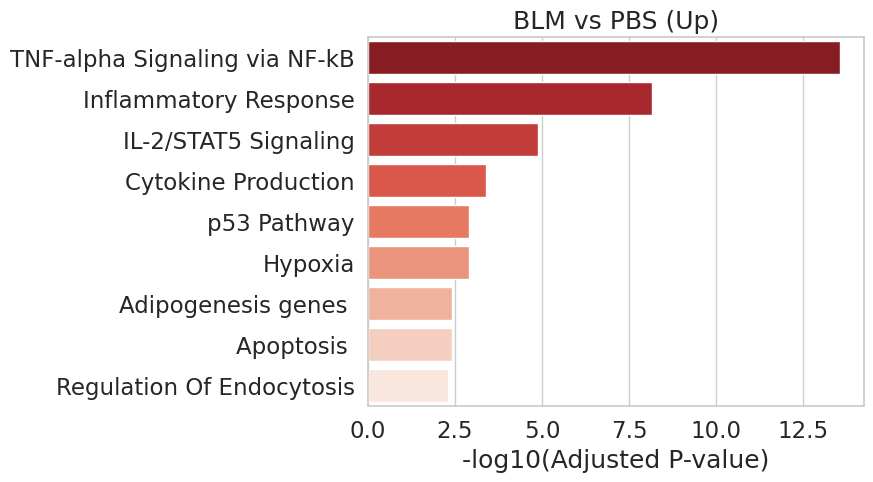

In [ ]:
sns.barplot(pathway_sig_plot,
            x="-log10(Adjusted P-value)",
            y="Term_sim", palette="Reds_r")
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.ylabel('')
plt.title('BLM vs PBS (Up)')
plt.savefig(pathwaydir+'combind_sig.pdf', bbox_inches='tight')

## 2.2 down regulation

In [ ]:
pathwaydir = '/home/lzz/atac/output/atac_bs_dw_regulated/'
dirlist = glob.glob(
    pathname=pathwaydir+'*reports.txt',
    recursive=True)
dirlist

['/home/lzz/atac/output/atac_bs_dw_regulated/KEGG_2019_Mouse.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_dw_regulated/MSigDB_Hallmark_2020.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_dw_regulated/WikiPathways_2019_Mouse.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_dw_regulated/Reactome_2022.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_dw_regulated/GO_Biological_Process_2023.mouse.enrichr.reports.txt']

In [ ]:
filelist = []
for i in dirlist:
    tmp = pd.read_table(i)
    print(tmp.shape)
    filelist.append(tmp)

(1002, 10)
(47, 10)
(225, 10)
(2297, 10)
(104, 10)


In [ ]:
pathway_all = pd.concat(filelist, ignore_index=True)
pathway_sig = pathway_all.loc[pathway_all['Adjusted P-value'] < 0.05, :]
pathway_sig['Gene_set'].value_counts()
pathway_sig = pathway_sig.sort_values('Adjusted P-value')
pathway_sig = pathway_sig.reset_index(drop=True)
pathway_sig.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2022,Signal Transduction R-HSA-162582,102/2465,2.548378e-08,0.000026,0,0,1.943466,33.98193,SPARC;FAM13B;IRS1;FAM13A;NAB2;HDAC11;IGF1R;PDK...
1,KEGG_2019_Mouse,Pathways in cancer,32/535,2.629952e-06,0.000592,0,0,2.682125,34.46140,ITGB1;TCF7;XIAP;ADCY2;IGF1R;DLL4;GNA13;GNA11;H...
2,KEGG_2019_Mouse,Signaling pathways regulating pluripotency of ...,14/137,5.986891e-06,0.000674,0,0,4.706710,56.60261,APC2;LIFR;ACVR1B;ACVR2B;IGF1R;BMP4;ID1;ID4;ID3...
3,GO_Biological_Process_2023,Transmembrane Receptor Protein Serine/Threonin...,15/130,5.932062e-07,0.001363,0,0,5.407469,77.53080,ACVRL1;ITGB1;APLP2;TGFB1I1;WFIKKN2;ACVR1B;SIRT...
4,Reactome_2022,RAC1 GTPase Cycle R-HSA-9013149,16/178,7.003757e-06,0.002774,0,0,4.093372,48.58450,ITGB1;ARHGEF10;FAM13B;FAM13A;AMIGO2;ARHGAP29;A...


In [ ]:
pathway_sig['Term_sim'] = pathway_sig['Term'].str.split(' \\(GO|WP| R-HSA').str[0]
pathway_sig['-log10(Adjusted P-value)'] = -np.log10(pathway_sig['Adjusted P-value'])
pathway_sig.to_csv(pathwaydir+'combind_sig.csv')

In [ ]:
pathway_sig = pd.read_csv(pathwaydir+'combind_sig.csv', index_col=0)

In [ ]:
pathway_sig_plot = pathway_sig.iloc[0:9, :]
pathway_sig_plot

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Term_sim,-log10(Adjusted P-value)
0,Reactome_2022,Signal Transduction R-HSA-162582,102/2465,2.548378e-08,0.000026,0,0,1.943466,33.98193,SPARC;FAM13B;IRS1;FAM13A;NAB2;HDAC11;IGF1R;PDK...,Signal Transduction,4.592869
2,KEGG_2019_Mouse,Signaling pathways regulating pluripotency of ...,14/137,5.986891e-06,0.000674,0,0,4.706710,56.60261,APC2;LIFR;ACVR1B;ACVR2B;IGF1R;BMP4;ID1;ID4;ID3...,Regulation Of pluripotency of stem cells,3.171646
3,GO_Biological_Process_2023,Transmembrane Receptor Ser/Thr Kinase Signalin...,15/130,5.932062e-07,0.001363,0,0,5.407469,77.53080,ACVRL1;ITGB1;APLP2;TGFB1I1;WFIKKN2;ACVR1B;SIRT...,Transmembrane Receptor Ser/Thr Kinase Signaling,2.865633
4,Reactome_2022,RAC1 GTPase Cycle R-HSA-9013149,16/178,7.003757e-06,0.002774,0,0,4.093372,48.58450,ITGB1;ARHGEF10;FAM13B;FAM13A;AMIGO2;ARHGAP29;A...,RAC1 GTPase Cycle,2.556947
6,Reactome_2022,Signaling By NOTCH1 R-HSA-1980143,10/74,1.107249e-05,0.002774,0,0,6.426070,73.32819,DLL4;HEYL;TLE2;TBL1XR1;HDAC11;HEY2;EP300;ADAM1...,Signaling By NOTCH1,2.556947
8,KEGG_2019_Mouse,TGF-beta signaling pathway,10/91,6.874115e-05,0.005156,0,0,5.072952,48.62507,BMP4;ID1;ID4;EP300;ID3;ACVR1B;NEO1;ACVR2B;MAPK...,TGF-beta signaling pathway,2.287722
14,Reactome_2022,Signaling By Receptor Tyrosine Kinases R-HSA-9...,27/496,8.089377e-05,0.011579,0,0,2.404781,22.65874,ITGB1;SPARC;IRS1;NAB2;ITPR3;IGF1R;LRIG1;EP300;...,Signaling By Receptor Tyrosine Kinases,1.936315
23,Reactome_2022,Integration Of Energy Metabolism R-HSA-163685,10/105,2.285989e-04,0.017158,0,0,4.322243,36.23571,SNAP25;MARCKS;ADCY9;GNA11;ITPR3;ADCY2;PLCB1;AC...,Integration Of Energy Metabolism,1.765532
27,KEGG_2019_Mouse,Wnt signaling pathway,12/160,5.246841e-04,0.018248,0,0,3.334309,25.18308,APC2;TBL1XR1;RYK;4930444G20RIK;TCF7;PRICKLE2;E...,Wnt signaling pathway,1.738780


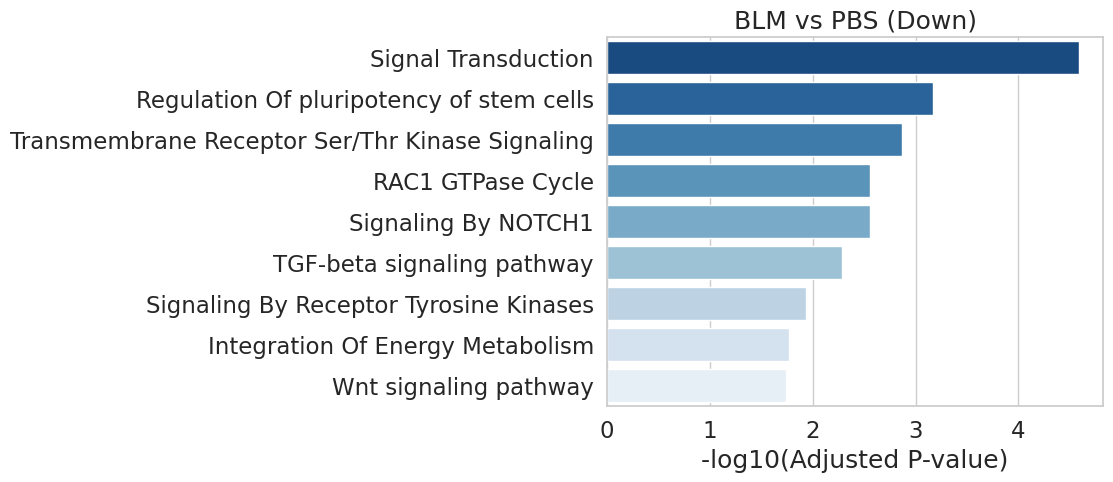

In [ ]:
sns.barplot(pathway_sig_plot,
            x="-log10(Adjusted P-value)",
            y="Term_sim", palette="Blues_r")
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.ylabel('')
plt.title('BLM vs PBS (Down)')
plt.savefig(pathwaydir+'combind_sig.pdf', bbox_inches='tight')

# 3.Only Enrichment

## 3.1 up regulation

In [ ]:
data_dir = '/home/lzz/atac/output/'
save_dir = '/home/lzz/atac/output/'

In [ ]:
deg_df = pd.read_csv(data_dir+'up_regulated_diff_anno.csv', index_col=0)
deg_df

,PeakID (cmd=annotatePeaks.pl /mnt/i/Suspended/ATAC-seq/mm10_t3_atac/Runtime/data/peak_info.bed mm10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
17,B21-3A_FKDL190740160-1a_peak_164748b,chr14,31669753,31670252,+,0,NaN,Intergenic,NaN,28945.0,NM_025295,26363.0,Mm.282679,NM_025295,ENSMUSG00000021900,Btd,-,biotinidase,protein-coding
39,B21-1A_FKDL190740158-1a_peak_406022b,chr6,120077066,120077565,+,0,NaN,Intergenic,NaN,-16065.0,NM_016718,29862.0,Mm.103668,NM_016718,ENSMUSG00000041377,Ninj2,-,ninjurin 2,protein-coding
41,T21-2A_FKDL190740162-1a_peak_292672,chr2,148536453,148536952,+,0,NaN,Intergenic,NaN,-93167.0,NM_010740,17064.0,Mm.681,NM_010740,ENSMUSG00000027435,Cd93,6030404G09Rik|AA145088|AA4.1|AW555904|C1qr1|C1...,CD93 antigen,protein-coding
75,T21-3A_FKDL190740163-1a_peak_84721,chr12,99213176,99213675,+,0,NaN,intron,NaN,-50617.0,NR_038130,67639.0,Mm.87374,NR_038130,ENSMUSG00000113210,4930474N09Rik,-,RIKEN cDNA 4930474N09 gene,ncRNA
143,S21-3A_FKDL190740157-1a_peak_345439c,chr6,120082854,120083353,+,0,NaN,Intergenic,NaN,-10277.0,NM_016718,29862.0,Mm.103668,NM_016718,ENSMUSG00000041377,Ninj2,-,ninjurin 2,protein-coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34002,T21-1A_FKDL190740161-1a_peak_448235,chr8,57589151,57589650,+,0,NaN,intron,NaN,-62353.0,NR_040698,100502619.0,Mm.393851,NR_040698,NaN,AW046200,-,expressed sequence AW046200,ncRNA
34005,B21-3A_FKDL190740160-1a_peak_220692a,chr16,52060199,52060698,+,0,NaN,intron,NaN,28899.0,NM_001033238,208650.0,Mm.328206,NM_001033238,ENSMUSG00000022637,Cblb,AI429560|AI851073|Cbl-b,Casitas B-lineage lymphoma b,protein-coding
34013,T21-1A_FKDL190740161-1a_peak_464359b,chr8,122144730,122145229,+,0,NaN,Intergenic,NaN,-85295.0,NM_001362883,195209.0,Mm.102191,NM_001362883,NaN,Zfp469,Gm22,zinc finger protein 469,protein-coding
34202,T21-1A_FKDL190740161-1a_peak_481485a,chr9,64564307,64564806,+,0,NaN,intron,NaN,173200.0,NM_017382,53869.0,Mm.1387,NM_017382,ENSMUSG00000004771,Rab11a,-,"RAB11A, member RAS oncogene family",protein-coding


In [ ]:
deg_df['Annotation'].value_counts()

Annotation
intron          313
Intergenic      276
promoter-TSS     60
3' UTR           11
5' UTR            8
exon              6
TTS               6
Name: count, dtype: int64

In [ ]:
deg_df_sub = deg_df[deg_df['Annotation'] == 'promoter-TSS']
deg_df_sub.head()

,PeakID (cmd=annotatePeaks.pl /mnt/i/Suspended/ATAC-seq/mm10_t3_atac/Runtime/data/peak_info.bed mm10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
530,S21-3A_FKDL190740157-1a_peak_423577d,chr9,85327594,85328093,+,0,NaN,promoter-TSS,NaN,-693.0,NM_001160379,212943.0,Mm.74610,NM_001160378,ENSMUSG00000032265,Tent5a,BAP014|D930050G01Rik|Fam46a,terminal nucleotidyltransferase 5A,protein-coding
940,B21-3A_FKDL190740160-1a_peak_234741c,chr17,25833173,25833672,+,0,NaN,promoter-TSS,NaN,-503.0,NR_157362,56424.0,Mm.277599,NM_019719,ENSMUSG00000039615,Stub1,0610033N24Rik|2210017D18Rik|2310040B03Rik|AW04...,STIP1 homology and U-Box containing protein 1,protein-coding
1467,T21-3A_FKDL190740163-1a_peak_163520b,chr17,35979578,35980077,+,0,NaN,promoter-TSS,NaN,-2.0,NM_001282013,75210.0,Mm.40036,NM_145487,ENSMUSG00000038500,Prr3,4930540G07Rik|Cat56,proline-rich polypeptide 3,protein-coding
1548,T21-1A_FKDL190740161-1a_peak_165469c,chr15,78406188,78406687,+,0,NaN,promoter-TSS,NaN,-275.0,NM_001162493,246221.0,Mm.294215,NM_138670,ENSMUSG00000071711,Mpst,Mst,mercaptopyruvate sulfurtransferase,protein-coding
2123,B21-3A_FKDL190740160-1a_peak_45121d,chr10,40883583,40884082,+,0,NaN,promoter-TSS,NaN,298.0,NM_031877,83767.0,Mm.41353,NM_031877,ENSMUSG00000019831,Wasf1,AI195380|AI838537|Scar|WAVE|WAVE-1,"WAS protein family, member 1",protein-coding


In [ ]:
gene_sets=[
    'Reactome_2022', 'MSigDB_Hallmark_2020', 'KEGG_2019_Mouse',
    'GO_Biological_Process_2023', 'WikiPathways_2019_Mouse']

In [ ]:
enr_up = gp.enrichr(
    gene_list=list(deg_df_sub['Gene Name']),
    gene_sets=gene_sets,
    cutoff = 1,
    organism='mouse',
    outdir=save_dir+'atac_bs_up_promoter')

## 3.2 down regulation

In [ ]:
deg_df = pd.read_csv(data_dir+'down_regulated_diff_anno.csv', index_col=0)
deg_df

,PeakID (cmd=annotatePeaks.pl /mnt/i/Suspended/ATAC-seq/mm10_t3_atac/Runtime/data/peak_info.bed mm10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
16,S21-2A_FKDL190740156-1a_peak_112861,chr12,85818369,85818868,+,0,NaN,TTS,NaN,6275.0,NM_001360451,58520.0,Mm.143795,NM_021446,ENSMUSG00000021252,Erg28,0610007P14Rik|1190004E09Rik|AU019315|C77855|ORF11,ergosterol biosynthesis 28,protein-coding
51,B21-1A_FKDL190740158-1a_peak_473156e,chr8,121084058,121084557,+,0,NaN,promoter-TSS,NaN,-79.0,NM_010426,15227.0,Mm.33897,NM_010426,ENSMUSG00000042812,Foxf1,AI450827|FREAC1|Foxf1a|Freac-1|HFH-8|Hfh8,forkhead box F1,protein-coding
118,T21-2A_FKDL190740162-1a_peak_416506d,chr6,72899613,72900112,+,0,NaN,promoter-TSS,NaN,117.0,NM_019715,74287.0,Mm.29194,NM_019715,ENSMUSG00000055239,Kcmf1,1700094M07Rik|Debt91|Pmcf,potassium channel modulatory factor 1,protein-coding
254,S21-2A_FKDL190740156-1a_peak_269106b,chr2,14055831,14056330,+,0,NaN,promoter-TSS,NaN,-45.0,NM_001012396,30963.0,Mm.241205,NM_013935,ENSMUSG00000063275,Hacd1,Ptpla,3-hydroxyacyl-CoA dehydratase 1,protein-coding
303,S21-2A_FKDL190740156-1a_peak_206947,chr16,91597556,91598055,+,0,NaN,promoter-TSS,NaN,-125.0,NM_030018,77975.0,Mm.290341,NM_030018,ENSMUSG00000022964,Tmem50b,AU015466|AU019872|B230114J08Rik,transmembrane protein 50B,protein-coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34027,S21-2A_FKDL190740156-1a_peak_52221c,chr10,84533863,84534362,+,0,NaN,promoter-TSS,NaN,-224.0,NM_175451,216197.0,Mm.334999,NM_175451,ENSMUSG00000046841,Ckap4,5630400A09Rik|CLIMP-63|P63,cytoskeleton-associated protein 4,protein-coding
34085,B21-3A_FKDL190740160-1a_peak_463377b,chr6,90764076,90764575,+,0,NaN,intron,NaN,45798.0,NM_001134384,232227.0,Mm.196943,NM_182784,ENSMUSG00000034312,Iqsec1,AW561907|BC026481|BRAG2|D6Ertd349e|cI-43,IQ motif and Sec7 domain 1,protein-coding
34131,S21-1A_FKDL190740155-1a_peak_505050a,chr5,134541605,134542104,+,0,NaN,intron,NaN,10580.0,NM_001039162,269713.0,Mm.255138,NM_009990,ENSMUSG00000063146,Clip2,B230327O20|CLIP-115|Clip1|Cyln2|WSCR4|mKIAA029...,CAP-GLY domain containing linker protein 2,protein-coding
34146,T21-2A_FKDL190740162-1a_peak_286804b,chr2,119314861,119315360,+,0,NaN,Intergenic,NaN,-10674.0,NM_019454,54485.0,Mm.143719,NM_019454,ENSMUSG00000027314,Dll4,Delta4,delta like canonical Notch ligand 4,protein-coding


In [ ]:
deg_df['Annotation'].value_counts()

Annotation
promoter-TSS    336
Intergenic      127
intron          121
TTS              14
exon              8
5' UTR            8
3' UTR            5
Name: count, dtype: int64

In [ ]:
deg_df_sub = deg_df[deg_df['Annotation'] == 'promoter-TSS']
deg_df_sub.head()

,PeakID (cmd=annotatePeaks.pl /mnt/i/Suspended/ATAC-seq/mm10_t3_atac/Runtime/data/peak_info.bed mm10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
51,B21-1A_FKDL190740158-1a_peak_473156e,chr8,121084058,121084557,+,0,NaN,promoter-TSS,NaN,-79.0,NM_010426,15227.0,Mm.33897,NM_010426,ENSMUSG00000042812,Foxf1,AI450827|FREAC1|Foxf1a|Freac-1|HFH-8|Hfh8,forkhead box F1,protein-coding
118,T21-2A_FKDL190740162-1a_peak_416506d,chr6,72899613,72900112,+,0,NaN,promoter-TSS,NaN,117.0,NM_019715,74287.0,Mm.29194,NM_019715,ENSMUSG00000055239,Kcmf1,1700094M07Rik|Debt91|Pmcf,potassium channel modulatory factor 1,protein-coding
254,S21-2A_FKDL190740156-1a_peak_269106b,chr2,14055831,14056330,+,0,NaN,promoter-TSS,NaN,-45.0,NM_001012396,30963.0,Mm.241205,NM_013935,ENSMUSG00000063275,Hacd1,Ptpla,3-hydroxyacyl-CoA dehydratase 1,protein-coding
303,S21-2A_FKDL190740156-1a_peak_206947,chr16,91597556,91598055,+,0,NaN,promoter-TSS,NaN,-125.0,NM_030018,77975.0,Mm.290341,NM_030018,ENSMUSG00000022964,Tmem50b,AU015466|AU019872|B230114J08Rik,transmembrane protein 50B,protein-coding
492,S21-2A_FKDL190740156-1a_peak_356985,chr4,132732309,132732808,+,0,NaN,promoter-TSS,NaN,-12.0,NM_201368,381560.0,Mm.44558,NM_201368,ENSMUSG00000037752,Xkr8,4931440N07Rik|AI597014|Gm1031|XRG8|mXkr8,X-linked Kx blood group related 8,protein-coding


In [ ]:
gene_sets=[
    'Reactome_2022', 'MSigDB_Hallmark_2020', 'KEGG_2019_Mouse',
    'GO_Biological_Process_2023', 'WikiPathways_2019_Mouse']

In [ ]:
enr_up = gp.enrichr(
    gene_list=list(deg_df_sub['Gene Name']),
    gene_sets=gene_sets,
    cutoff = 1,
    organism='mouse',
    outdir=save_dir+'atac_bs_dw_promoter')

# 4.Pathway plot

## 4.1 up regulation

In [ ]:
pathwaydir = '/home/lzz/atac/output/atac_bs_up_promoter/'
dirlist = glob.glob(
    pathname=pathwaydir+'*reports.txt',
    recursive=True)
dirlist

['/home/lzz/atac/output/atac_bs_up_promoter/KEGG_2019_Mouse.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_up_promoter/MSigDB_Hallmark_2020.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_up_promoter/WikiPathways_2019_Mouse.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_up_promoter/Reactome_2022.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_up_promoter/GO_Biological_Process_2023.mouse.enrichr.reports.txt']

In [ ]:
filelist = []
for i in dirlist:
    tmp = pd.read_table(i)
    print(tmp.shape)
    filelist.append(tmp)

(50, 10)
(16, 10)
(13, 10)
(188, 10)
(500, 10)


In [ ]:
pathway_all = pd.concat(filelist, ignore_index=True)
pathway_sig = pathway_all.loc[pathway_all['Adjusted P-value'] < 0.05, :]
pathway_sig['Gene_set'].value_counts()
pathway_sig = pathway_sig.sort_values('Adjusted P-value')
pathway_sig = pathway_sig.reset_index(drop=True)
pathway_sig.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


In [ ]:
pathway_sig['Term_sim'] = pathway_sig['Term'].str.split(' \\(GO|WP| R-HSA').str[0]
pathway_sig['-log10(Adjusted P-value)'] = -np.log10(pathway_sig['Adjusted P-value'])
pathway_sig.to_csv(pathwaydir+'combind_sig.csv')

In [ ]:
pathway_sig = pd.read_csv(pathwaydir+'combind_sig.csv', index_col=0)
pathway_sig

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Term_sim,-log10(Adjusted P-value)


In [ ]:
pathway_sig_plot = pathway_sig.iloc[0:9, :]
pathway_sig_plot

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Term_sim,-log10(Adjusted P-value)
0,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,31/200,5.754340e-16,2.704540e-14,0,0,7.446721,261.31590,BTG2;BTG1;CD83;PFKFB3;TNFAIP2;RNF19B;TNFAIP3;L...,TNF-alpha Signaling via NF-kB,13.567907
1,MSigDB_Hallmark_2020,Inflammatory Response,24/200,2.971249e-10,6.982434e-09,0,0,5.453698,119.63710,ABCA1;BTG2;PTGER2;SLC11A2;LIF;IL18;OSM;SLC1A2;...,Inflammatory Response,8.155993
2,MSigDB_Hallmark_2020,IL-2/STAT5 Signaling,19/199,8.074251e-07,1.264966e-05,0,0,4.177448,58.60715,CD86;CD83;AHNAK;CD81;PTGER2;LIF;FURIN;TNFRSF1B...,IL-2/STAT5 Signaling,4.897921
6,GO_Biological_Process_2023,Cytokine Production (GO:0001819),25/320,7.157978e-07,4.149478e-04,0,0,3.375413,47.76165,CD86;ITK;TXK;PTPN22;PDE4B;NLRP3;SLAMF6;TNFRSF1...,Cytokine Production,3.382007
17,MSigDB_Hallmark_2020,p53 Pathway,15/200,1.867878e-04,1.254146e-03,0,0,3.181938,27.31865,BTG2;BTG1;CD81;VDR;LIF;RNF19B;SLC7A11;FOS;IL1A...,p53 Pathway,2.901652
19,MSigDB_Hallmark_2020,Hypoxia,15/200,1.867878e-04,1.254146e-03,0,0,3.181938,27.31865,BTG1;PFKFB3;DUSP1;HEXA;PDGFB;TNFAIP3;FOS;RBPJ;...,Hypoxia,2.901652
36,WikiPathways_2019_Mouse,Adipogenesis genes WP447,12/134,1.584711e-04,3.953703e-03,0,0,3.849180,33.68009,NCOR2;TLE3;SOCS3;MEF2C;IL6;KLF6;SOCS1;RXRA;LIF...,Adipogenesis genes,2.402996
38,WikiPathways_2019_Mouse,Apoptosis WP1254,9/81,2.080896e-04,3.953703e-03,0,0,4.874749,41.32589,IKBKB;CRADD;MDM2;IRF5;PIK3R1;FADD;IGF1;TNFRSF1...,Apoptosis,2.402996
40,GO_Biological_Process_2023,Regulation Of Endocytosis (GO:0030100),9/66,4.128724e-05,5.066534e-03,0,0,6.162334,62.20849,FGR;LGALS3;SYK;LRP1;SRC;PACSIN2;STON2;RAB17;LE...,Regulation Of Endocytosis,2.295289


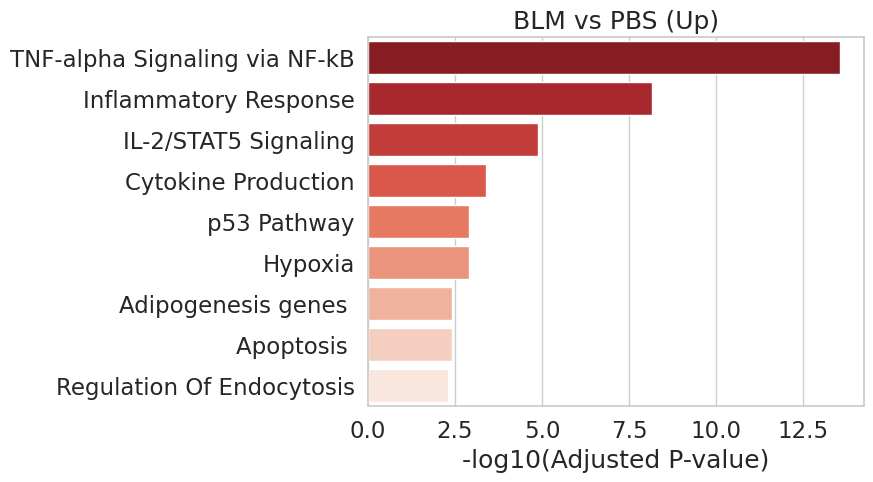

In [ ]:
sns.barplot(pathway_sig_plot,
            x="-log10(Adjusted P-value)",
            y="Term_sim", palette="Reds_r")
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.ylabel('')
plt.title('BLM vs PBS (Up)')
plt.savefig(pathwaydir+'combind_sig.pdf', bbox_inches='tight')

## 4.2 down regulation

In [ ]:
pathwaydir = '/home/lzz/atac/output/atac_bs_dw_promoter/'
dirlist = glob.glob(
    pathname=pathwaydir+'*reports.txt',
    recursive=True)
dirlist

['/home/lzz/atac/output/atac_bs_dw_promoter/KEGG_2019_Mouse.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_dw_promoter/MSigDB_Hallmark_2020.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_dw_promoter/WikiPathways_2019_Mouse.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_dw_promoter/Reactome_2022.mouse.enrichr.reports.txt',
 '/home/lzz/atac/output/atac_bs_dw_promoter/GO_Biological_Process_2023.mouse.enrichr.reports.txt']

In [ ]:
filelist = []
for i in dirlist:
    tmp = pd.read_table(i)
    print(tmp.shape)
    filelist.append(tmp)

(210, 10)
(42, 10)
(87, 10)
(784, 10)
(1751, 10)


In [ ]:
pathway_all = pd.concat(filelist, ignore_index=True)
pathway_sig = pathway_all.loc[pathway_all['Adjusted P-value'] < 0.05, :]
pathway_sig['Gene_set'].value_counts()
pathway_sig = pathway_sig.sort_values('Adjusted P-value')
pathway_sig = pathway_sig.reset_index(drop=True)
pathway_sig.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2022,Signal Transduction R-HSA-162582,58/2465,0.000010,0.008101,0,0,1.997579,22.93244,RARG;FAM13B;IRS1;HDAC11;FAM13A;NAB2;IGF1R;HEY2...
1,KEGG_2019_Mouse,Pathways in cancer,19/535,0.000112,0.012144,0,0,2.853237,25.94338,EGLN1;ARHGEF12;APAF1;STAT2;ZBTB16;XIAP;ADCY2;I...
2,KEGG_2019_Mouse,Long-term depression,6/61,0.000161,0.012144,0,0,8.224869,71.85588,GNA13;GNAO1;ITPR3;PLCB1;IGF1R;MAPK3
3,KEGG_2019_Mouse,GnRH signaling pathway,7/90,0.000203,0.012144,0,0,6.373957,54.18899,ADCY9;ITPR3;ADCY2;GRB2;PLCB1;HBEGF;MAPK3
4,KEGG_2019_Mouse,Oxytocin signaling pathway,9/154,0.000231,0.012144,0,0,4.712430,39.45114,GNAO1;ADCY9;CACNA2D1;ITPR3;ADCY2;EEF2;PPP1R12B...


In [ ]:
pathway_sig['Term_sim'] = pathway_sig['Term'].str.split(' \\(GO|WP| R-HSA').str[0]
pathway_sig['-log10(Adjusted P-value)'] = -np.log10(pathway_sig['Adjusted P-value'])
pathway_sig.to_csv(pathwaydir+'combind_sig.csv')

In [ ]:
pathway_sig = pd.read_csv(pathwaydir+'combind_sig.csv', index_col=0)

In [ ]:
pathway_sig_plot = pathway_sig.iloc[0:9, :]
pathway_sig_plot

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Term_sim,-log10(Adjusted P-value)
0,Reactome_2022,Signal Transduction R-HSA-162582,58/2465,0.000010,0.008101,0,0,1.997579,22.93244,RARG;FAM13B;IRS1;HDAC11;FAM13A;NAB2;IGF1R;HEY2...,Signal Transduction,2.091436
1,KEGG_2019_Mouse,Pathways in cancer,19/535,0.000112,0.012144,0,0,2.853237,25.94338,EGLN1;ARHGEF12;APAF1;STAT2;ZBTB16;XIAP;ADCY2;I...,Pathways in cancer,1.915633
2,KEGG_2019_Mouse,Long-term depression,6/61,0.000161,0.012144,0,0,8.224869,71.85588,GNA13;GNAO1;ITPR3;PLCB1;IGF1R;MAPK3,Long-term depression,1.915633
3,KEGG_2019_Mouse,GnRH signaling pathway,7/90,0.000203,0.012144,0,0,6.373957,54.18899,ADCY9;ITPR3;ADCY2;GRB2;PLCB1;HBEGF;MAPK3,GnRH signaling pathway,1.915633
4,KEGG_2019_Mouse,Oxytocin signaling pathway,9/154,0.000231,0.012144,0,0,4.712430,39.45114,GNAO1;ADCY9;CACNA2D1;ITPR3;ADCY2;EEF2;PPP1R12B...,Oxytocin signaling pathway,1.915633
5,GO_Biological_Process_2023,Cellular Response To Growth Factor Stimulus (G...,11/155,0.000008,0.013454,0,0,5.845242,68.78428,DLL4;GAREM1;APLP2;SPRY2;MAPT;PTPN12;ACVR1B;ACV...,Cellular Response To Growth Factor Stimulus,1.871151
6,GO_Biological_Process_2023,Dorsal Aorta Development (GO:0035907),3/6,0.000046,0.013454,0,0,74.734850,746.89910,DLL4;HEY2;BMPR1A,Dorsal Aorta Development,1.871151
7,GO_Biological_Process_2023,Dorsal Aorta Morphogenesis (GO:0035912),3/6,0.000046,0.013454,0,0,74.734850,746.89910,DLL4;HEY2;BMPR1A,Dorsal Aorta Morphogenesis,1.871151
8,GO_Biological_Process_2023,Protein Phosphorylation (GO:0006468),19/500,0.000046,0.013454,0,0,3.066427,30.61726,EPHA7;RYK;DYRK1A;ADAM10;LMTK2;CDC42BPA;ACVR1B;...,Protein Phosphorylation,1.871151


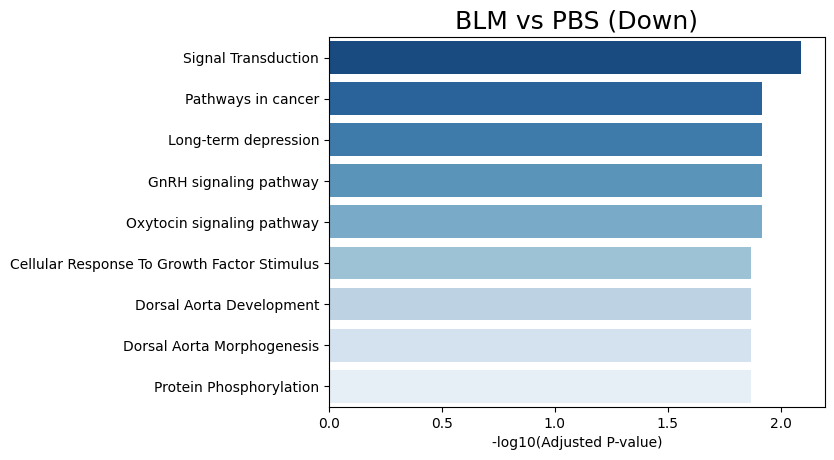

In [ ]:
sns.barplot(pathway_sig_plot,
            x="-log10(Adjusted P-value)",
            y="Term_sim", palette="Blues_r")
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.ylabel('')
plt.title('BLM vs PBS (Down)')
plt.savefig(pathwaydir+'combind_sig.pdf', bbox_inches='tight')